# **MHT CET** **COUNSELLING COLLEGE PREDICTION** PROJECT BY ***VNBL***

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [10]:
import pandas as pd

# Replace 'your_uploaded_file.csv' with the name of the uploaded file
df = pd.read_csv('mht_cet1.csv')




In [11]:
df.head()  # to check first few rows ans colm are loaded or not

,college_name,score_type,seat_type,branch,sum,count,max,min,mean,max-min,max-mean
0,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,TFWS,Computer Engineering,299.638141,3,99.913236,99.843394,99.879380,0.069842,0.033856
1,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,LOPENS,Computer Engineering,699.371128,7,100.000000,99.829843,99.910161,0.170156,0.089839
2,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,GOPENS,Computer Engineering,1698.390955,17,99.995273,99.817615,99.905350,0.177659,0.089923
3,COEP Technological University,MHT-CET,GNT3S,Computer Engineering,99.803612,1,99.803612,99.803612,99.803612,0.000000,0.000000
4,COEP Technological University,MHT-CET,LNT2S,Computer Engineering,99.787304,1,99.787304,99.787304,99.787304,0.000000,0.000000


In [12]:
# find attribute / collums in file
col_name= df.columns
print("Columns")
print(col_name)

Columns
Index(['college_name', 'score_type', 'seat_type', 'branch', 'sum', 'count',
       'max', 'min', 'mean', 'max-min', 'max-mean'],
      dtype='object')


In [13]:
# check missing values
mis_val=df.isnull().sum()

# now display with missing values
colm_with_mis_values=mis_val[mis_val> 0]
print("colm_with_mis_values")
print(colm_with_mis_values)


colm_with_mis_values
Series([], dtype: int64)


In [14]:
# remove duplicates from dataframe
df= df.drop_duplicates()

# print , df.shape to verify duplicates have been removed
print("Duplicates removed,Shape of dataframe : " ,df.shape)

Duplicates removed,Shape of dataframe :  (28377, 11)


In [15]:
# conver multiple columns to float
float_columns=['sum','count','max','min','max-min','max-mean']
df[float_columns]=df[float_columns].astype(float)


Statistics part + visualization

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
#calculate basic statistics
numeric_stats= df.describe()
# print statistics
print("asic statistics for numeric colmns: ")
print(numeric_stats)


asic statistics for numeric colmns: 
                sum         count           max           min          mean  \
count  28377.000000  28377.000000  28377.000000  28377.000000  28377.000000   
mean     233.107703      3.677098     59.974110     52.102999     55.774946   
std      451.505203      5.807874     26.164252     28.700460     26.526845   
min        0.004739      1.000000      0.004739      0.004739      0.004739   
25%       48.141988      1.000000     41.187314     26.900779     34.329932   
50%       84.382602      2.000000     64.060928     55.218152     58.566008   
75%      242.888443      4.000000     81.973434     76.990020     78.391101   
max     9076.725302     92.000000    100.000000     99.843394     99.910161   

            max-min      max-mean  
count  28377.000000  28377.000000  
mean       7.871111      4.199164  
std       14.426868      7.838619  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.060330      0.028206  

In [18]:
# Visualize the data distribution of numeric features
numeric_columns = ['sum', 'count', 'max', 'min', 'mean', 'max-min', 'max-mean']

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

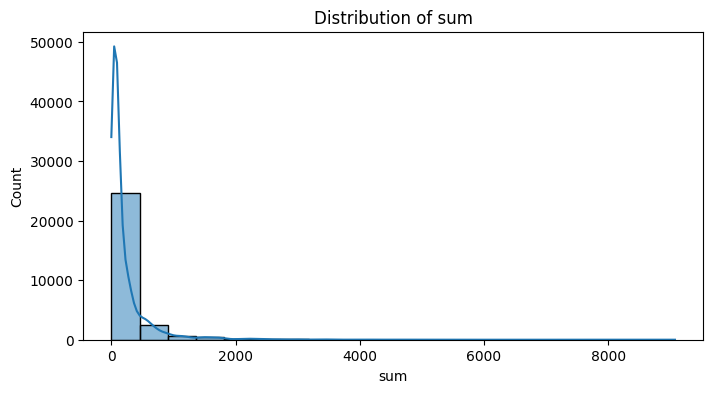

In [19]:
# histogram
for col in numeric_columns:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col],bins=20,kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylable('Frequency')
  plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

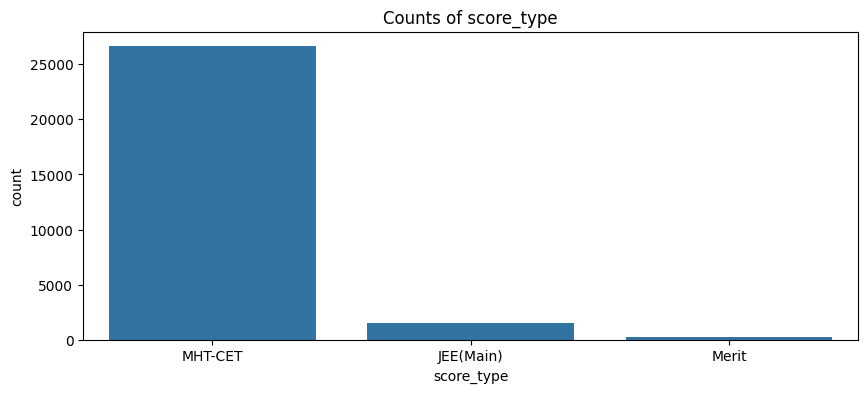

In [ ]:
# Visualize categorical features using bar plots or count plots
categorical_columns=['score_type','seat_type','branch']

for col in categorical_columns:
  plt.figure(figsize=(10,4))
  sns.countplot(data=df,x=col,order=df[col].value_counts().index)
  plt.title(f'Counts of {col}')
  plt.xlable(col)
  plt.ylable('Count')
  plt.xticks(rotation=45)
  plt.show()


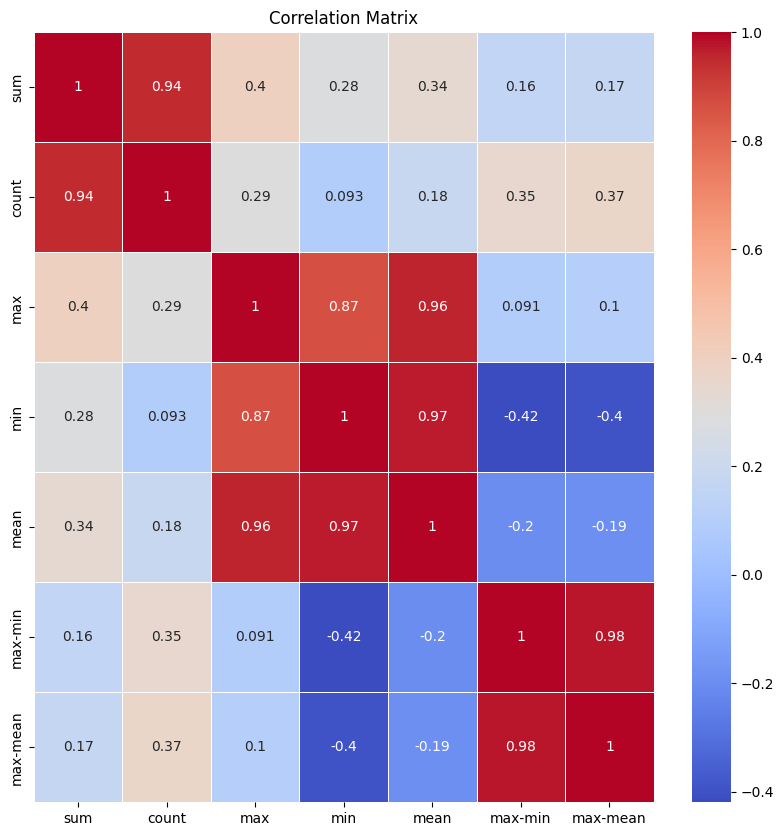

In [ ]:
#correlation matrix
correlation_matrix=df[numeric_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

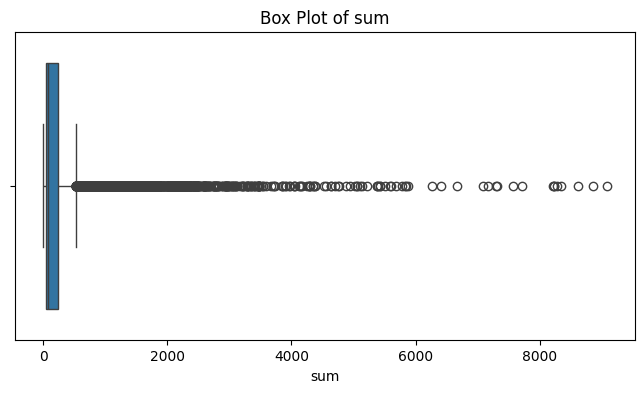

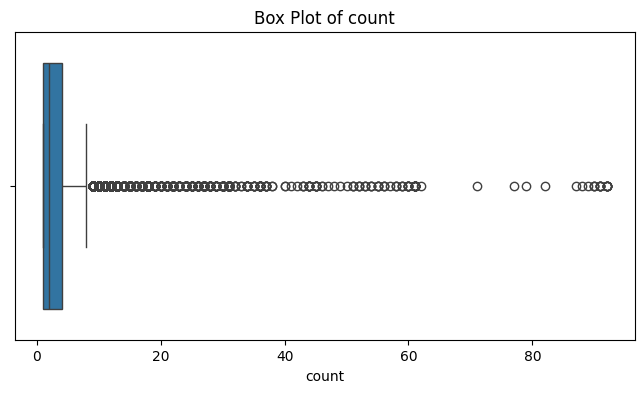

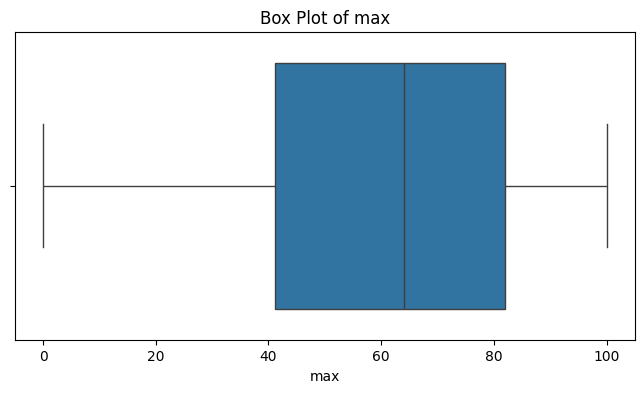

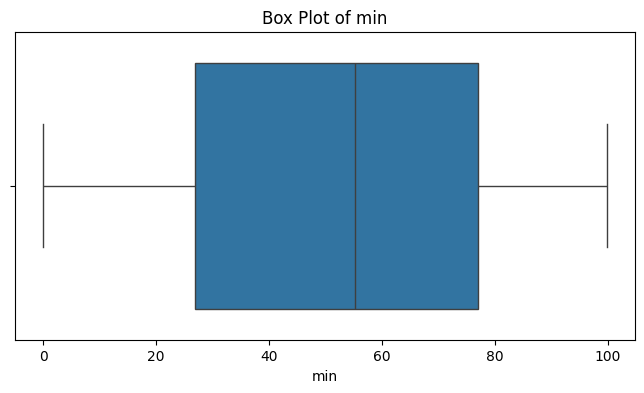

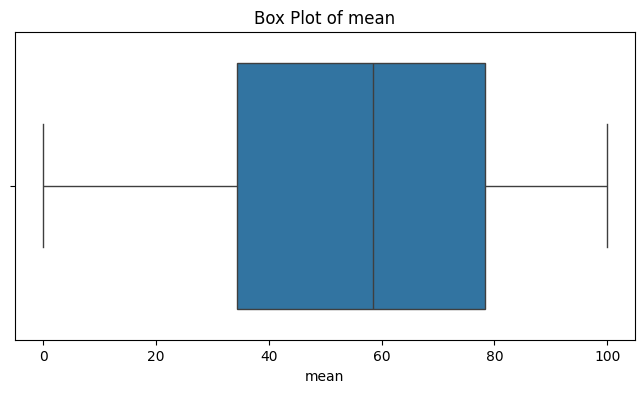

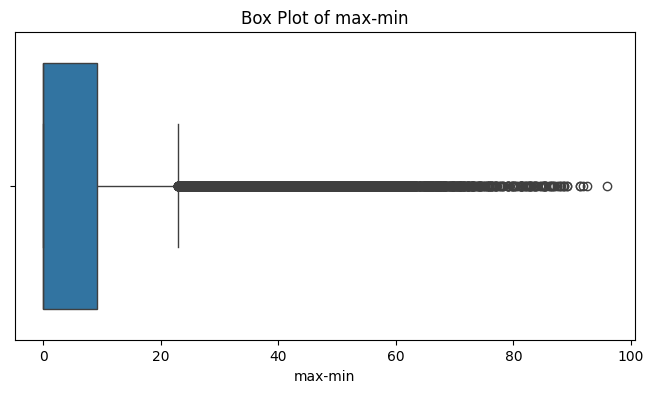

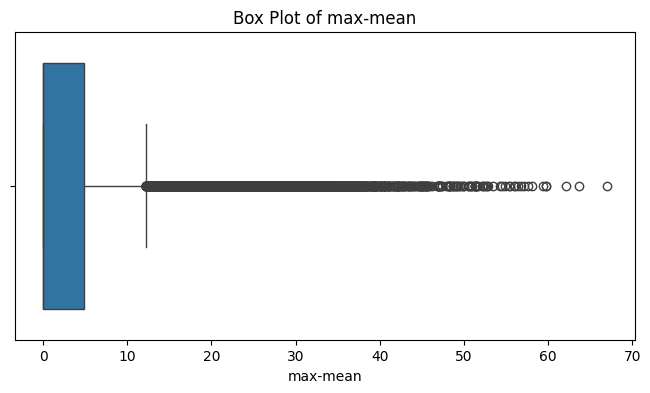

In [ ]:
#Box Plots for Numeric Columns:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:
branch_seat_counts = df.groupby(['college_name', 'branch', 'seat_type']).size().reset_index(name='count')


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from ipywidgets import widgets
from IPython.display import display, clear_output


# Define the features (X) and target (y)
features = ['max', 'min', 'max-min', 'max-mean']
X = df[features]
y = df['college_name'] + ' - ' + df['branch']

# Create a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Create input widgets for max, min, max-min, and max-mean
max_input = widgets.FloatText(value=0, description='Max:')
min_input = widgets.FloatText(value=0, description='Min:')
max_min_input = widgets.FloatText(value=0, description='Max-Min:')
max_mean_input = widgets.FloatText(value=0, description='Max-Mean:')

# Create a button for prediction
predict_button = widgets.Button(description='Predict College & Branch')

# Function to predict college and branch
def predict_college_branch(_):
    clear_output()
    max_val = max_input.value
    min_val = min_input.value
    max_min_val = max_min_input.value
    max_mean_val = max_mean_input.value

    input_data = [[max_val, min_val, max_min_val, max_mean_val]]
    predicted_class = model.predict(input_data)

    if predicted_class:
        print(f"Predicted College & Branch: {predicted_class[0]}")
    else:
        print("Prediction not available.")

# Bind the button click event to the predict_college_branch function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(max_input, min_input, max_min_input, max_mean_input, predict_button)


MemoryError: could not allocate 457703424 bytes

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


model

In [24]:
import os
os.getcwd()


'c:\\Users\\vlanj\\OneDrive\\Desktop\\3rd yr pr\\ml\\mht_cet_clg_pred'

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# # Define the path to the uploaded dataset
# file_path = '/content/mht_cet1.csv'

# # Load the dataset
# df = pd.read_csv(file_path)

# Create input widgets for percentile
percentile_input = widgets.FloatText(value=0, description='Percentile:', step=0.01)

# Create a button for prediction
predict_button = widgets.Button(description='Predict College & Branch')

# Function to predict college and branch based on percentile
def predict_college_branch(_):
    clear_output()
    percentile = percentile_input.value

    # Calculate the percentile range
    min_percentile = df['min'].quantile(percentile)
    max_percentile = df['max'].quantile(percentile)

    # Filter the dataset based on the percentile range
    filtered_data = df[(df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        college_branch_list = filtered_data[['college_name', 'branch']].values.tolist()[:20]  # Display the first 20 results
        print("Colleges & Branches within the Percentile Range:")
        for college, branch in college_branch_list:
            print(f"{college} - {branch}")
    else:
        print("No results found within the specified percentile range.")

# Bind the button click event to the predict_college_branch function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(percentile_input, predict_button)


Colleges & Branches within the Percentile Range:
Bhagwant Institute of Technology, Barshi - Electronics and Telecommunication Engg
CSMSS Chh. Shahu College of Engineering, Aurangabad - Civil Engineering
Guru Nanak Institute of Engineering & Technology,Kalmeshwar, Nagpur - Electrical Engineering
Kolhapur Institute of Technology's College of Engineering(Autonomous), Kolhapur - Civil and Environmental Engineering
M.G.M.'s College of Engineering and Technology, Kamothe, Navi Mumbai - Computer Engineering
MET's Institute of Technology Polytechnic, Bhujbal Knowledge City, Adgaon Nashik - Automation and Robotics
Mauli Group of Institutions, College of Engineering and Technology, Shegaon. - Civil Engineering
Nagnathappa Halge Engineering  College, Parli, Beed - Computer Science and Engineering
R.V. Parankar College of Engineering & Technology, Arvi, Dist Wardha - Electrical Engineering
Sahyadri Valley College of Engineering & Technology, Rajuri, Pune. - Mechanical Engineering
Shahajirao Patil 

In [ ]:
import pandas as pd

# Load the dataset (assuming the file is already uploaded)

# Get user inputs
percentile = float(input("Enter a percentile value (e.g., 0.9 for 90th percentile): "))
branch = input("Enter a branch: ")

# Calculate the percentile range
min_percentile = df['min'].quantile(percentile)
max_percentile = df['max'].quantile(percentile)

# Filter the dataset based on the percentile and branch
filtered_data = df[(df['min'] >= min_percentile) & (df['max'] <= max_percentile) & (df['branch'] == branch)]

if not filtered_data.empty:
    college_branch_list = filtered_data[['college_name', 'branch']].values.tolist()
    print("Colleges & Branches within the specified percentile and branch:")
    for college, branch in college_branch_list:
        print(f"{college} - {branch}")
else:
    print("No results found within the specified criteria.")


In [ ]:
import pandas as pd

# Load your filtered dataset here
# Replace 'your_filtered_dataset.csv' with the actual filename


# Define a function for predicting college and branch based on percentile and branch
def predict_college_branch(branch, percentile):
    if percentile < 0 or percentile > 100:
        return "Percentile should be within the range [0, 100]."

    if branch not in df['branch'].unique():
        return "Branch not found in the dataset."

    min_percentile = df['min'].quantile(percentile / 100)
    max_percentile = df['max'].quantile(percentile / 100)

    filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
        return result_table
    else:
        return "No results found within the specified criteria."

# Example usage:
branch_input = "Computer Engineering"
percentile_input = 80  # Example percentile value

result = predict_college_branch(branch_input, percentile_input)
print(result)


                                           college_name                branch  \
4193   Indira College of Engineering & Management, Pune  Computer Engineering   
4203  Sinhgad Technical Education Society's Smt. Kas...  Computer Engineering   
4204  TSSM's Bhivarabai Sawant College of Engineerin...  Computer Engineering   
4217  Marathwada Mitra Mandal's Institute of Technol...  Computer Engineering   
4221  Sinhgad Technical Education Society, Sinhgad I...  Computer Engineering   
...                                                 ...                   ...   
5678  Dr. Vithalrao Vikhe Patil College of Engineeri...  Computer Engineering   
5679  Dr.D.Y.Patil College Of Engineering & Innovati...  Computer Engineering   
5699  Progressive Education Society's Modern College...  Computer Engineering   
5703  Sandip Foundation, Sandip Institute of Technol...  Computer Engineering   
5708  Sinhgad Technical Education Society, Sinhgad I...  Computer Engineering   

            min        max 

In [20]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load your filtered dataset here
# Replace 'your_filtered_dataset.csv' with the actual filename


# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying the results
output = widgets.Output()

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value

    with output:
        output.clear_output()

        min_percentile = df['min'].quantile(percentile / 100)
        max_percentile = df['max'].quantile(percentile / 100)

        filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

        if not filtered_data.empty:
            result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
            display(result_table)
        else:
            print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(branch_dropdown, percentile_slider, predict_button, output)


Dropdown(description='Branch:', options=('Computer Engineering', 'Information Technology', 'Electronics and Te…

FloatSlider(value=50.0, description='Percentile:', step=1.0)

Button(description='Predict', style=ButtonStyle())

Output()

In [21]:
%pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from docx import Document



# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value

    document = Document()  # Create a Word document

    # Add the title at the top of the document
    document.add_heading('VNBL MHT-CET COUNSELLING', 0)

    min_percentile = df['min'].quantile(percentile / 100)
    max_percentile = df['max'].quantile(percentile / 100)

    filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
        # Add the table to the document
        table = document.add_table(result_table.shape[0] + 1, result_table.shape[1])
        for i in range(result_table.shape[0] + 1):
            for j in range(result_table.shape[1]):
                cell = table.cell(i, j)
                if i == 0:
                    cell.text = result_table.columns[j]
                else:
                    cell.text = str(result_table.iloc[i - 1, j])

        # Save the document to a file
        docx_filename = 'predicted_colleges.docx'
        document.save(docx_filename)
        print(f"Results saved to {docx_filename}")
    else:
        print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(branch_dropdown, percentile_slider, predict_button)


Dropdown(description='Branch:', options=('Computer Engineering', 'Information Technology', 'Electronics and Te…

FloatSlider(value=50.0, description='Percentile:', step=1.0)

Button(description='Predict', style=ButtonStyle())

Results saved to predicted_colleges.docx
Results saved to predicted_colleges.docx
